# Modeling and Simulations Project 1

Studio 1

Jinfay Yuan & Jack Mao

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

from pandas import read_html

In [2]:
tables = read_html('https://en.wikipedia.org/wiki/United_States_immigration_statistics',
header=0,
decimal = '.',
index_col=0)
table2 = tables[1]
table2.index.get_loc('China')

56

In [3]:
China = table2.loc['China']
China = China.reindex(index=China.index[::-1])

index = China.index.astype(float)
values = China.values.astype(float)

china = TimeSeries(data = values, index = index)

,values
1850.0,758.0
1860.0,35565.0
1870.0,63042.0
1880.0,104468.0
1890.0,106688.0
1900.0,81534.0
1910.0,56756.0
1920.0,43560.0
1950.0,46129.0
1960.0,99735.0


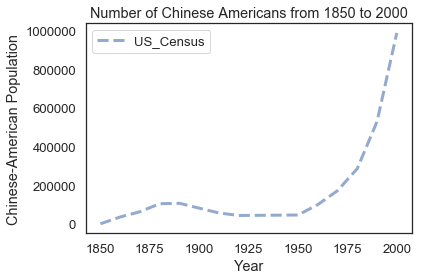

In [4]:
plot(china, '--',label='US_Census')
decorate(xlabel='Year', 
            ylabel='Chinese-American Population',
            title="Number of Chinese Americans from 1850 to 2000")

## What would the Chinese-American population look like today if the Chinese Exclusion Act of 1882 and the Geary Act had not existed?
As the previous figure shows, the Chinese-American population significantly decreased during 1880-1920. This phenomenon is the effect of the Chinese Exclusion Act of 1882 and the Geary Act, which banned the immigration of Chinese laborers into the United States. With no influx of immigrants, the population of Chinese-Americans began to fade with time.

If these policies were never approved, what would the Chinese-American population look like today?

To dive deeper into this question, we will model immigration rate based on the change in population prior to the passing of the two policies. Using this model, we can then produce immigration rates for the years in which the policies were passed and create a population model that explores an answer to our question.


[1850. 1860. 1870. 1880. 1890. 1900. 1910. 1920. 1930. 1940. 1950. 1960.
 1970. 1980. 1990. 2000.]


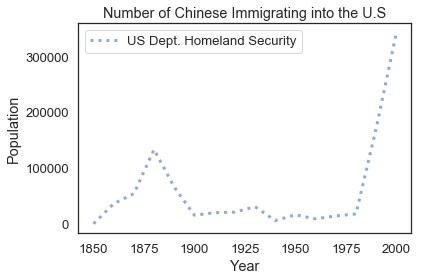

In [5]:
Year = linrange(1850, 2000, 10,endpoint=True)
print(Year)
pop = [32, 35933,54028, 133139, 65797, 15268, 19884, 20916, 30648, 5874, 16072, 8836, 14060, 17627, 170897,342058] 
immigrant_influx = TimeSeries(pop, Year)

plot(immigrant_influx, ':', label='US Dept. Homeland Security')
decorate(xlabel='Year', 
            ylabel='Population',
            title="Number of Chinese Immigrating into the U.S")


In [6]:
def plot_results(immigrant_influx,timeseries,title):
    """Plot the estimates and the model.
    
    immigrant_influx = actual data of how many chinese-americans immigrated
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(immigrant_influx, ':', label='US Dept of Homeland Security')
    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='Population',
             title=title)

In [56]:
t_0 = 1850
t_end = 1870
elasped_time = t_end - t_0
p_0 = 32
p_end = 133139
total_growth = p_end - p_0

decadal_growth = total_growth/(elasped_time/10)

66553.5

In [57]:
results = TimeSeries()
results[t_0] = 32
for t in linrange(t_0,t_end,10, endpoint=True):
    results[t+10] = results[t] + decadal_growth


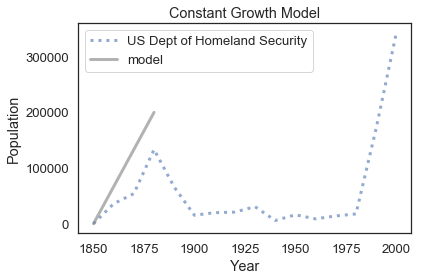

In [58]:
plot_results(immigrant_influx,results,'Constant Growth Model')

In [46]:
def run_simulation(system, update_func):
    results1 = TimeSeries()
    results1[system.t_0] = system.p_0
    
    for t in linrange(1850, 1870, 10,endpoint=True):
        results1[t+10] = update_func(results1[t], t, system)
        
    return results1

In [54]:

system = System(t_0=1850, 
                t_newend=1870,
                p_0=32,
                alpha=15)



def update_func_quad(pop, t, system):
    """Compute the population next year with a quadratic model.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year"""
    net_growth = system.alpha * pop 
    return pop + net_growth

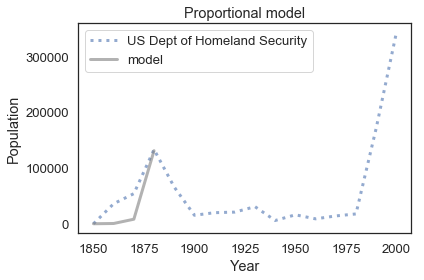

In [55]:
results1 = run_simulation(system, update_func_quad)
plot_results(immigrant_influx,results1,'Proportional model')


108000.0
